In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_full_df(misinfotext_path: str, fakespeak_path: str):
    def get_years_dfs():
        misinfotext_file = pd.ExcelFile(misinfotext_path)
        
        for sheet in misinfotext_file.sheet_names:
            if not "_proportion" in sheet:
                continue

            df = pd.read_excel(misinfotext_file, sheet_name=sheet)
            df["year"] = (sheet.replace("_proportion", ""))
            yield df
        
        fakespeak_file = pd.ExcelFile(fakespeak_path)
        
        for sheet in fakespeak_file.sheet_names:
            if not "_proportion" in sheet:
                continue

            df = pd.read_excel(fakespeak_file, sheet_name=sheet)
            df["year"] = (sheet.replace("_proportion", ""))
            yield df
    
    return pd.concat(get_years_dfs())

In [3]:
def plot_and_save_for_years(df: pd.DataFrame, title: str, save_path: str):
    grouped_by_year = df.groupby("year")
    values_per_year = dict((year, list(grouped_by_year.get_group(year)["proportion_quote_words_to_total_words"])) for year in grouped_by_year.groups)

    years = list(values_per_year.keys())
    positions = list(range(len(years)))
    mapping = {y: i for i, y in enumerate(years)}
    x_pos = df["year"].map(mapping)

    fig, ax = plt.subplots()
    ax.scatter(x_pos, df["proportion_quote_words_to_total_words"])
    ax.boxplot(list(values_per_year.values()), positions=positions)
    ax.set_xticks(positions)
    ax.set_xticklabels(years)
    ax.tick_params(axis="x", rotation=45)

    fig.suptitle(title)
    ax.set_xlabel("year")
    ax.set_ylabel("Number of words in quotes over number of words in entire article")

    plt.show()

    fig.savefig(save_path)

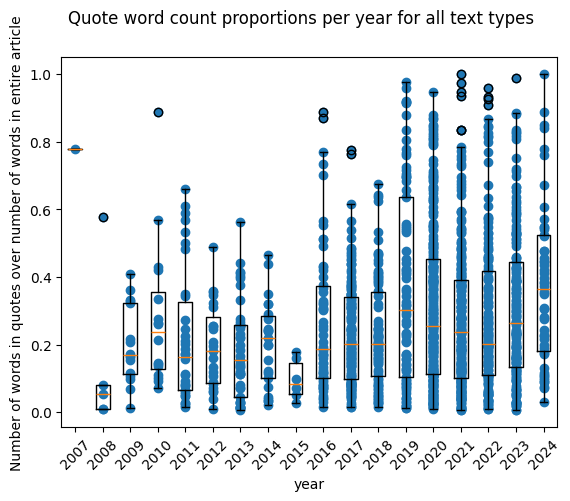

In [4]:
all_types_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_quotes.xlsx",
)

plot_and_save_for_years(
    df=all_types_df, 
    title="Quote word count proportions per year for all text types",
    save_path="./visualization/quotes/all_types.png"
)

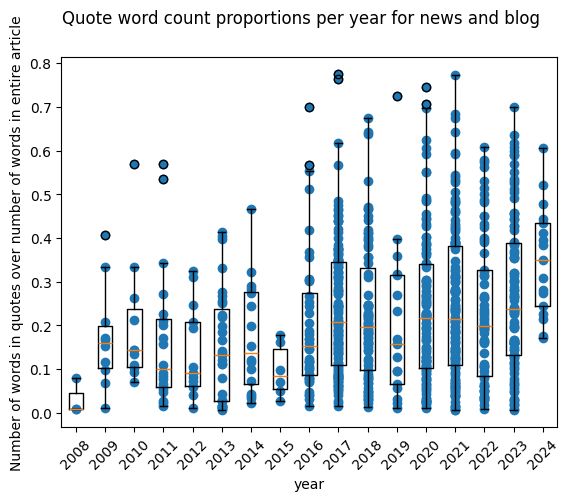

In [5]:
news_and_blog_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_quotes.xlsx",
)

plot_and_save_for_years(
    df=news_and_blog_df, 
    title="Quote word count proportions per year for news and blog",
    save_path="./visualization/quotes/news_and_blog.png"
)

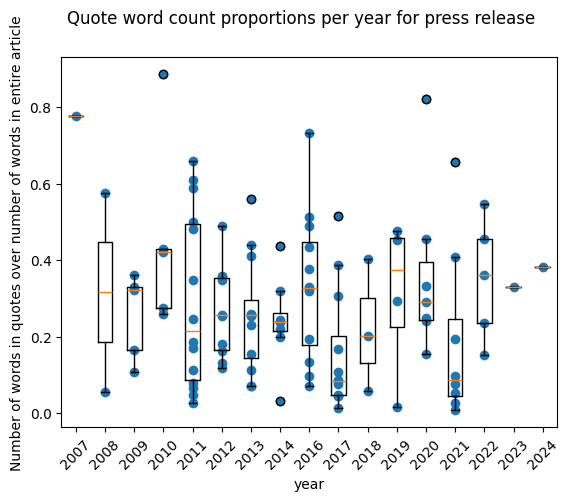

In [6]:
press_release_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_quotes.xlsx",
)

plot_and_save_for_years(
    df=press_release_df, 
    title="Quote word count proportions per year for press release",
    save_path="./visualization/quotes/press_release.png"
)

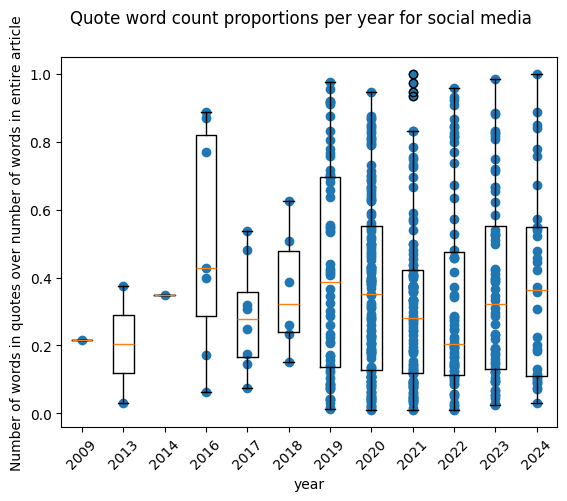

In [7]:
social_media_df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_quotes.xlsx",
)

plot_and_save_for_years(
    df=social_media_df, 
    title="Quote word count proportions per year for social media",
    save_path="./visualization/quotes/social_media.png"
)